# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import this

print()
print("pandas version:", pd.__version__)
print("statsmodels version:", sm.__version__)

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!

pandas version: 0.25.1
statsmodels version: 0.10.1


In [2]:
# Your code here.

# Setting the columns Values
Age, Tardies = [17,51,27,21,36,48,19,26,54,30], [10,1,5,9,4,2,9,6,0,3]

# Creating the DataFrame
student_data = pd.DataFrame({'X': Age, 'Y': Tardies})

student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

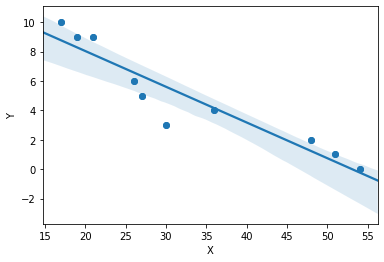

In [3]:
# Your code here.

# this
plt.figure()
plt.scatter(student_data['X'], student_data['Y'])

# or this?
sns.regplot(x = "X", y = "Y", data = student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
"""
It seems to have a negative correlation, i.e., that the younger the student, the more likely 
(s)he is of being late to class, confirming the initial hypothesis.
"""

'\nIt seems to have a negative correlation, i.e., that the younger the student, the more likely \n(s)he is of being late to class, confirming the initial hypothesis.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
print(student_data.corr())

#covariance:
print(student_data.cov())

"""
The Correlation Coefficient is a measure of how two variables move in relation to one 
another. A perfect positive correlation (1) means that when the value in one variable goes
up, so does the other in equal measure. A perfect negative correlation (-1) means that when
the value of one variable goes up, the other goes down (and vice-versa) in equal measure. 0
means that there's no correlation. So the closer to the extremes (1 or -1), the stronger the
correlation, while the closer to 0 the less correlated the two variables are.

Covariance is a similar idea, but with absolute (instead of relative) proportions. In this 
case (for example), a -45.56(6) means that when value goes up 1, the other goes down 
45.55(6). The most 'understandable'/revealing thing about the covariance is the sign 
(positive or negative), for it shows the tendency of the relationship.

In this case they tell me that the two variables are strongly negatively correlated, meaning
that the older the student the less likely (s)he is of being latte (and vice-versa).
"""

          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000
            X          Y
X  187.655556 -45.566667
Y  -45.566667  12.544444


"\nThe Correlation Coefficient is a measure of how two variables move in relation to one \nanother. A perfect positive correlation (1) means that when the value in one variable goes\nup, so does the other in equal measure. A perfect negative correlation (-1) means that when\nthe value of one variable goes up, the other goes down (and vice-versa) in equal measure. 0\nmeans that there's no correlation. So the closer to the extremes (1 or -1), the stronger the\ncorrelation, while the closer to 0 the less correlated the two variables are.\n\nCovariance is a similar idea, but with absolute (instead of relative) proportions. In this \ncase (for example), a -45.56(6) means that when value goes up 1, the other goes down \n45.55(6). The most 'understandable'/revealing thing about the covariance is the sign \n(positive or negative), for it shows the tendency of the relationship.\n\nIn this case they tell me that the two variables are strongly negatively correlated, meaning\nthat the older the st

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
# defining x and y
x, y = student_data["X"], student_data["Y"]

# calculating the intercept and slope
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print ("The slope is:", slope)
print ("The intercept is:", intercept)

# Building the model
model = sm.OLS(y, x)

# fitting the model
results = model.fit()

# making the predictions
predictions = results.predict(x)

predictions

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


0    1.633022
1    4.899065
2    2.593623
3    2.017262
4    3.458164
5    4.610885
6    1.825142
7    2.497563
8    5.187245
9    2.881803
dtype: float64

Plot your regression model on your scatter plot.

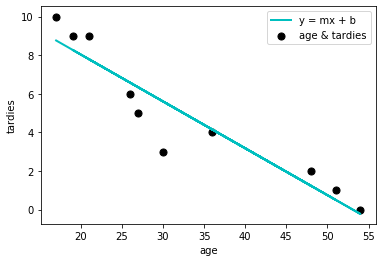

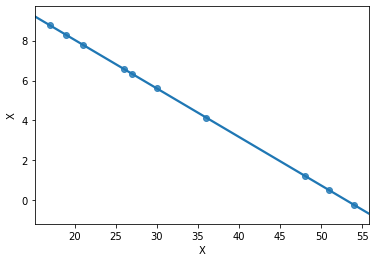

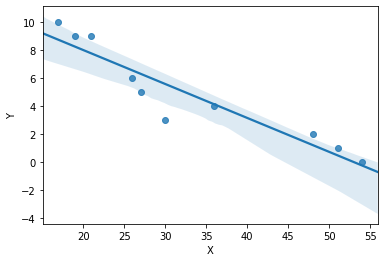

In [7]:
# Your code here.
# this
plt.figure()
plt.scatter(student_data["X"], student_data["Y"], color = "k", s = 50, label = "age & tardies")
plt.plot(x, slope * x + intercept, color = "c", lw = 2, label = "y = mx + b")
plt.xlabel("age")
plt.ylabel("tardies")
plt.legend()
plt.show()

# or this?
sns.regplot(x = "X", y = (slope * x + intercept), data = student_data)
plt.show()

# or this? <- so this plot is showing straight away the model, except that it goes to 
# negative values (margin of error?)?
sns.regplot(x = "X", y = "Y", data = student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# Your response here. 
# defining alpha @ 5%
alpha = 0.05

# checking the p-value and r2
print("p-value is:", p_value)
print("r-squared is:", (r_value ** 2))

# Conclusion from the p_value
print(f"\nWe CAN reject the Null Hypothesis at a {alpha} level. (i.e there is a relationship between the two variables)") \
if p_value < alpha else print(f"We CANNOT reject the Null hypothesis at a {alpha} level. (i.e. there's no relationship)")

# Conclusion from the r2
print(f"\nThis r-squared indicates that {round((r_value ** 2) * 100, 2)}% of the variance in tardiness can be explained by age.")

p-value is: 5.56665383455343e-05
r-squared is: 0.8820265558250108

We CAN reject the Null Hypothesis at a 0.05 level. (i.e there is a relationship between the two variables)

This r-squared indicates that 88.2% of the variance in tardiness can be explained by age.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
import numpy as np
import os
import re

# Directories & Files
print(os.listdir())

# Datasets directory
directory = "../datasets/"

# creating the DataFrames dynamically
# 1st step: store the names and filenames of the files as a key-value pair in a dictionary
datasets = {f"{re.sub('.csv', '', filename.lower())}": filename for filename in os.listdir(directory)}

# 2nd step: for each key in the datasets dictionary, create a DF
for name in datasets:
    print(name)
    globals()[name] = pd.read_csv(directory + datasets[name])

vehicles.head()
vehicles.tail()

['challenge1.ipynb', '.ipynb_checkpoints']
vehicles


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.0,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.0,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.0,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.0,1100
35951,smart,fortwo coupe,2016,0.9,3.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Premium,9.417429,32,39,35,255.0,1150


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.00,0.08,-0.22,0.20,-0.09,-0.22
Cylinders,0.08,1.00,0.74,-0.70,0.78,0.75
Fuel Barrels/Year,-0.22,0.74,1.00,-0.91,0.92,0.99
Combined MPG,0.20,-0.70,-0.91,1.00,-0.88,-0.93
Fuel Cost/Year,-0.09,0.78,0.92,-0.88,1.00,0.93
CO2 Emission Grams/Mile,-0.22,0.75,0.99,-0.93,0.93,1.00


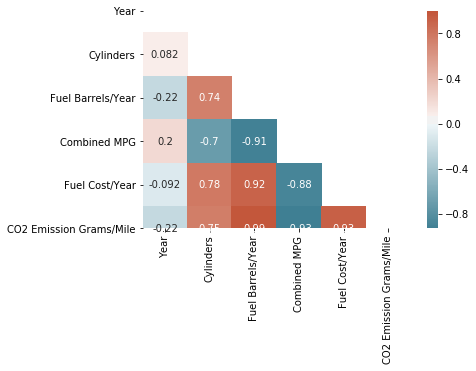

In [39]:
# Your response here. 
# make the correlation matrix
matrix = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", 
                        "Fuel Cost/Year", "CO2 Emission Grams/Mile"]].corr()

# creating a mask
mask = np.triu(np.ones_like(matrix, dtype = np.bool))

# creating a color map
cmap = sns.diverging_palette(220, 20, as_cmap = True)

# presenting a corr matrix. 
sns.heatmap(matrix, cmap = cmap, mask = mask, annot = True)
"""
Judging by this correlation matrix, the most important variable in determining CO2 emissions 
is Fuel Barrels/Year, with Fuel Cost/Year and Combined MPG (so fuel) as close seconds (though
combined Combined MPG inversly related).

The variable that provides the least amount of helpful information for determining CO2 
emissions is the Year.
"""
round(matrix, 2)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [51]:
# Your response here. 
# I'm infering from the title of the lab that it's to use a linear regression

# target (variable to predict)
target = vehicles["CO2 Emission Grams/Mile"]

# data/predictors (since "Year" has little correlation, should I take it out?)
predictors = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", 
                       "Fuel Cost/Year"]]

# Building the model
model = sm.OLS(target, predictors).fit()

# making the predictions
predictions = results.predict(predictors)

# Printing the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Sat, 29 Feb 2020   Prob (F-statistic):                        0.00
Time:                             22:18:28   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
# Your response here. 
"""
I'm using the OLS (Ordinary Least Squares and the method) Model, and the Least Squares method,
that means that we’re trying to fit a regression line that would minimize the square of 
distance from the regression line. 

Df of residuals and models relates to the degrees of freedom "the number of values in the 
final calculation of a statistic that are free to vary.”

The coefficients mean that as each variable increases by 1, the predicted value of 
CO2 Emission Grams/Mile increases by that amount (for example, so as Year increases by 1, our 
prediction increases 0.0630, and as Fuel Barrels/Year increase by one, our target increases by 
19.8588). 

The R-squared is the percentage of variance our model explains. In this case is very, very 
high.

The standard error is the standard deviation of the sampling distribution of a statistic, 
most commonly of the mean. 

The t scores and p-values, for hypothesis test.

Unfortunatly, I don't quite know/understand enough to interpret this report further.

source: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [13]:
# Your code here.


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [14]:
# Your code here.


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [15]:
# Your response here. 


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [16]:
# Your response here. 


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [17]:
# Your response here. 
